In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [8]:
iris = load_iris()
X = iris.data  
y = iris.target

In [10]:
y = to_categorical(y)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(4,)))  # Hidden layer 1
model.add(Dense(8, activation='relu'))                    # Hidden layer 2
model.add(Dense(3, activation='softmax'))

C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
history = model.fit(X_train, y_train, epochs=50, batch_size=5, verbose=0)


In [22]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("ANN Model Accuracy:", accuracy)
print("Loss:", loss)

ANN Model Accuracy: 0.9666666388511658
Loss: 0.10012974590063095


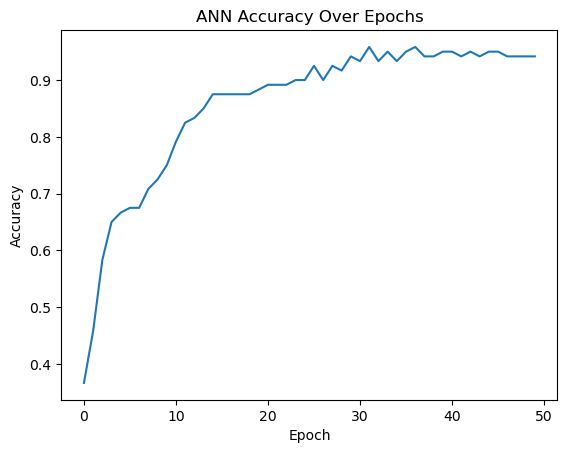

In [24]:
plt.plot(history.history['accuracy'])
plt.title("ANN Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

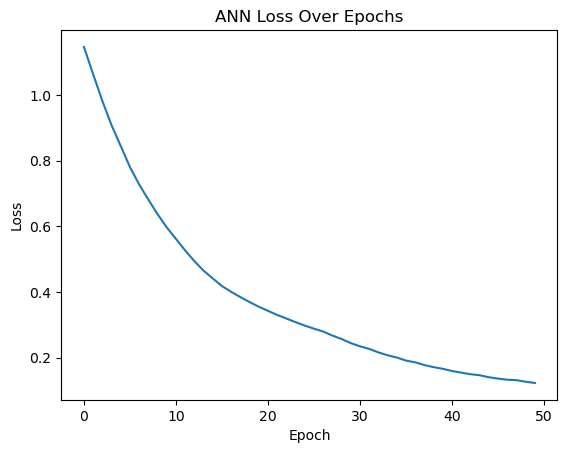

In [26]:
plt.plot(history.history['loss'])
plt.title("ANN Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()